In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# import self-made module
import os, sys, pathlib
file_path = os.path.abspath('')
PROJECT_DIR = str(pathlib.Path(file_path).parent)
sys.path.append(PROJECT_DIR)
print(f"Added {PROJECT_DIR} to PATH")
from athena import *
from sympy.vector import CoordSys3D, gradient, curl, ParametricRegion, vector_integrate, scalar_potential
from sympy.integrals.manualintegrate import integral_steps

sp.init_printing()

# ult functions
def reset_symbols():
    global x, y, z, a, b, c, d, e, f, g, h, r, s, k, t, u, v, theta, lmda, rho, phi
    x, y, z = sp.symbols('x y z', real=True)
    a, b, c, d, e, f, g, h, r, s, k, t, u, v = sp.symbols('a b c d e f g h r s k t u v', real=True)
    theta = sp.Symbol('theta')
    lmda = sp.Symbol('lambda')
    rho = sp.Symbol('rho')
    phi = sp.Symbol('phi')
    

reset_symbols()

Added D:\Dev\Code\MyMathLab to PATH


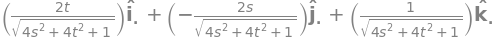

In [6]:
C = CoordSys3D('.')
vf = (t+1) * C.i + (s) * C.j + (s**2 - t**2 + 1) * C.k

vf_dt = vf.diff(t)
vf_ds = vf.diff(s)
cp = vf_dt.cross(vf_ds)
cp

uv = cp / (cp.magnitude())
uv
uv.subs({t:1, s:-2})

In [20]:
C = CoordSys3D('.')
vf = (t) * C.i + (s) * C.j + (4-t**2-s**2) * C.k

vf_dt = vf.diff(t)
vf_dt

vf_ds = vf.diff(s)
vf_ds

cp = vf_dt.cross(vf_ds)
cp

ff = (x*y) * C.i + (x*z) * C.j + (y*z) * C.k
ff_ts = ff.subs({x:vf.coeff(C.i), y:vf.coeff(C.j), z:vf.coeff(C.k)})
ff_ts

integrand = ff_ts.dot(cp)
integrand.integrate((s, -sp.sqrt(4-t**2), sp.sqrt(4-t**2)), (t, 0, 2))